In [1]:
import pandas
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 12, 8)
df = web.DataReader("AAPL", 'yahoo', start, end)
df

High         Low        Open       Close       Volume  \
Date                                                                      
2012-01-03   14.732143   14.607143   14.621429   14.686786  302220800.0   
2012-01-04   14.810000   14.617143   14.642857   14.765714  260022000.0   
2012-01-05   14.948214   14.738214   14.819643   14.929643  271269600.0   
2012-01-06   15.098214   14.972143   14.991786   15.085714  318292800.0   
2012-01-09   15.276786   15.048214   15.196429   15.061786  394024400.0   
...                ...         ...         ...         ...          ...   
2021-12-02  164.199997  157.800003  158.740005  163.759995  136739200.0   
2021-12-03  164.960007  159.720001  164.020004  161.839996  117938300.0   
2021-12-06  167.880005  164.279999  164.289993  165.320007  107497000.0   
2021-12-07  171.580002  168.339996  169.080002  171.179993  120098300.0   
2021-12-08  174.869995  170.699997  172.125000  174.054993   70048942.0   

             Adj Close  
Date                    
2012-01-03   12.591937  
2012-01-04   12.659607  
2012-01-05   12.800156  
2012-01-06   12.933967  
2012-01-09   12.913447  
...                ...  
2021-12-02  163.759995  
2021-12-03  161.839996  
2021-12-06  165.320007  
2021-12-07  171.179993  
2021-12-08  174.054993  

[2501 rows x 6 columns]

In [4]:
print(df.head())
print(df.shape)

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0  12.591937
2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0  12.659607
2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0  12.800156
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  12.933967
2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0  12.913447
(2501, 6)


In [5]:
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

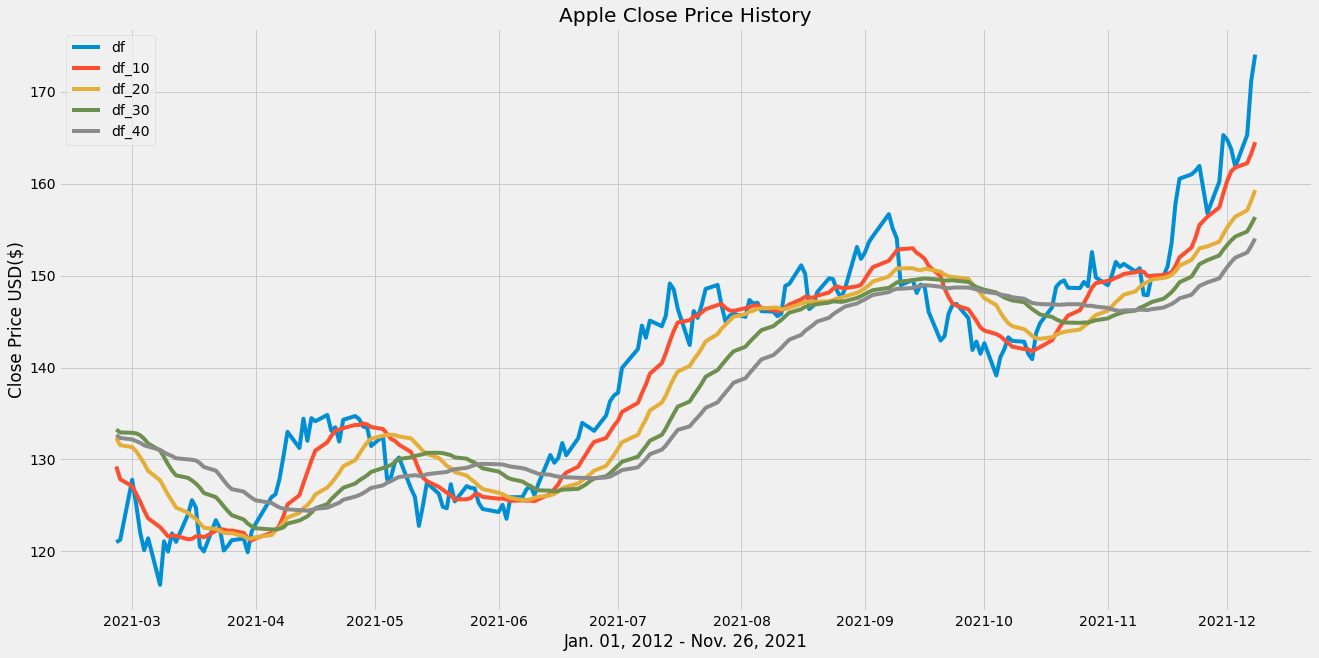

In [6]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='df')
plt.plot(df_10['Close'].tail(200), label='df_10')
plt.plot(df_20['Close'].tail(200), label='df_20')
plt.plot(df_30['Close'].tail(200), label='df_30')
plt.plot(df_40['Close'].tail(200), label='df_40')
plt.title('Apple Close Price History')
plt.xlabel('Jan. 01, 2012 - Nov. 26, 2021')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

Close
Date                 
2012-01-03  14.686786
2012-01-04  14.765714
2012-01-05  14.929643
2012-01-06  15.085714
2012-01-09  15.061786

In [8]:
dataset = data.values # to numpy array

In [9]:
#no. of rows
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2001

In [10]:
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.00461743],
        [0.0051104 ],
        [0.00613427],
        ...,
        [0.94544299],
        [0.98204331],
        [1.        ]]),
 (2501, 1))

In [11]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.00461743, 0.0051104 , 0.00613427, 0.00710906, 0.00695961,
       0.00729643, 0.00714252, 0.00688376, 0.00653132, 0.00762211,
       0.00860583, 0.00830246, 0.00664062, 0.00822661, 0.00666516,
       0.0125206 , 0.01206779, 0.01265891, 0.01393706, 0.01471109,
       0.01464641, 0.01440773, 0.0154249 , 0.01638185, 0.01746595,
       0.019217  , 0.02289533, 0.0229511 , 0.02499883, 0.02652905,
       0.02389913, 0.02491183, 0.02489176, 0.02773137, 0.02732762,
       0.02807488, 0.02941773, 0.030165  , 0.03231757, 0.03388571,
       0.03433853, 0.03449691, 0.03181568, 0.03116879, 0.03126471,
       0.03378534, 0.03449469, 0.03601822, 0.03960955, 0.04440097,
       0.04350425, 0.04350648, 0.04697068, 0.04805478, 0.04728296,
       0.04657809, 0.0458442 , 0.04828229, 0.04995528, 0.0506557 ])]
[0.04892471730359697]

[array([0.00461743, 0.0051104 , 0.00613427, 0.00710906, 0.00695961,
       0.00729643, 0.00714252, 0.00688376, 0.00653132, 0.00762211,
       0.00860583, 0.00830246, 0.00

In [12]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1941, 60, 1)

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1941/1941 [==============================] - 43s 21ms/step - loss: 2.3331e-04
Epoch 2/5
1941/1941 [==============================] - 40s 21ms/step - loss: 9.5556e-05
Epoch 3/5
1941/1941 [==============================] - 39s 20ms/step - loss: 7.8383e-05
Epoch 4/5
1941/1941 [==============================] - 39s 20ms/step - loss: 7.2198e-05 0s - loss: 7.2260e-0
Epoch 5/5
1941/1941 [==============================] - 39s 20ms/step - loss: 4.4781e-05


In [17]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [19]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
print(predictions[0:5], y_test[0:5])

[[67.75124 ]
 [68.812874]
 [69.16574 ]
 [69.061386]
 [69.02943 ]] [[69.96499634]
 [70.10250092]
 [69.93499756]
 [70.00499725]
 [69.86000061]]


In [22]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mse, rmse

(11.435129231776013, 3.3815867919921874)

<ipython-input-23-549ceefe4e21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


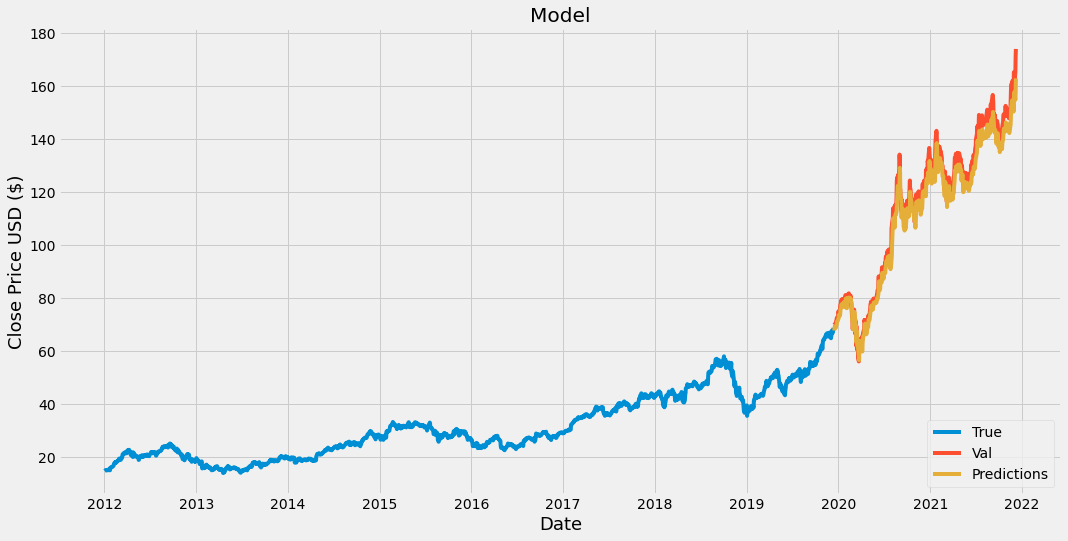

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [24]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-08')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 day 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print( "Predicted Price",pred_price)

Predicted Price [[166.27975]]


In [30]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-12-08', end='2021-12-08')
apple_quote2

High         Low        Open       Close     Volume  \
Date                                                                    
2021-12-07  171.580002  168.339996  169.080002  171.179993  120098300   
2021-12-08  174.869995  170.699997  172.125000  174.309998   70534002   

             Adj Close  
Date                    
2021-12-07  171.179993  
2021-12-08  174.309998

In [29]:
y_pred = pred_price[0][0]
y_test = apple_quote2.iat[0,5]
print('Accuracy ',100 - (((y_test - y_pred)/y_test)*100))

Accuracy  97.13737688586625
